In [1]:

%matplotlib inline    
# to let the plots appear within the notebook

# 1. Import Libraries
import pandas as pd        # to load and manipilate data
import numpy as np           # to control numerical operation
                

# preprocessing and model evaluation tools import
from sklearn.model_selection import train_test_split, GridSearchCV    # splits tunes model parameters & dataset 
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize # encoding strings to numbers and scales data

# To measure model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier    # To adapts models for multiclass ROC curves
from sklearn.model_selection import GridSearchCV

# machine http://localhost:8889/treelearning models import
from sklearn.linear_model import LogisticRegression   # deal with classification using logistic regression
from sklearn.neighbors import KNeighborsClassifier    #  K-nearest Neighbours classification
from sklearn.ensemble import RandomForestClassifier     #  For Random forest ensemble classifier
from sklearn.svm import SVC                           # to support vector machine classifier

import matplotlib.pyplot as plt         # for creating stsatic plots and graphs
import seaborn as  sns  

In [22]:
# 2. Load the dataset (by ensuring CSV file is in the same folder)
movie = pd.read_csv("movie_genre_classification_final.csv")

# Display the first few rows
movie.head()

,Title,Year,Director,Duration,Rating,Votes,Description,Language,Country,Budget_USD,BoxOffice_USD,Genre,Production_Company,Content_Rating,Lead_Actor,Num_Awards,Critic_Reviews
0,Winds of Fate 4,1980,R. Lee,167,4.1,182425,A touching love story with heartwarming moments.,Spanish,China,39979615,179936008,Romance,DreamWorks,R,Kangana Ranaut,8,229
1,Firestorm 11,2014,S. Chen,166,4.1,449351,A fast-paced thriller with intense action scenes.,Korean,China,116404774,802121619,Action,Netflix,R,Kangana Ranaut,20,466
2,Silent Echo 2,2016,A. Khan,170,4.1,363328,A fast-paced thriller with intense action scenes.,Korean,Japan,166261330,225526871,Action,Pixar,PG,Amitabh Bachchan,16,539
3,City Lights 4,1982,L. Zhang,170,9.9,62371,An emotional journey exploring complex charact...,Japanese,Japan,28861315,69813738,Drama,Netflix,NC-17,Natalie Portman,15,606
4,Broken Truth 1,1990,L. Zhang,91,5.3,4600,An imaginative world filled with magic and won...,Korean,USA,43890403,375136716,Fantasy,Studio Ghibli,PG,Chris Evans,6,330


In [23]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               50000 non-null  object 
 1   Year                50000 non-null  int64  
 2   Director            50000 non-null  object 
 3   Duration            50000 non-null  int64  
 4   Rating              50000 non-null  float64
 5   Votes               50000 non-null  int64  
 6   Description         50000 non-null  object 
 7   Language            50000 non-null  object 
 8   Country             50000 non-null  object 
 9   Budget_USD          50000 non-null  int64  
 10  BoxOffice_USD       50000 non-null  int64  
 11  Genre               50000 non-null  object 
 12  Production_Company  50000 non-null  object 
 13  Content_Rating      50000 non-null  object 
 14  Lead_Actor          50000 non-null  object 
 15  Num_Awards          50000 non-null  int64  
 16  Crit

In [24]:
# 3. Check for missing values
print(movie.isnull().sum())     # to print the numbers of missing values per a column


# To removes all the rows that have missing data to ensure the training of model works smoothly
movie = movie.dropna()

# To encode or change text into numeric values because ML work with numbers only
label_encoders = {}       # To create empty dictionary to store encoders for each column
for column in movie.select_dtypes(include=['object']).columns:   # To loop through all the column with text data
    le = LabelEncoder()                                      # To create a label encoder instance
    movie[column] = le.fit_transform(movie[column])        #  To change text into nemeric labels
    label_encoders[column] = le                      # This to save encoder for future decoding in case

# Separate target (y) & features (x)
X = movie.drop("Genre", axis=1) # Replace 'genre' with the correct target column name
y = movie["Genre"]              #  this is the target column we want to predict

# Standardize numeric features values for the uniformity and to improved the model performance
scaler = StandardScaler() # To create a scaler instance
X_scaled = scaler.fit_transform(X)   # std to mean =1 & scale features =0

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  # testing to be 20% & training to be 80% 

Title                 0
Year                  0
Director              0
Duration              0
Rating                0
Votes                 0
Description           0
Language              0
Country               0
Budget_USD            0
BoxOffice_USD         0
Genre                 0
Production_Company    0
Content_Rating        0
Lead_Actor            0
Num_Awards            0
Critic_Reviews        0
dtype: int64


In [25]:
# 4. Initialize models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # model 1
    "KNN": KNeighborsClassifier(n_neighbors=5),                 # model 2
    "SVM": SVC(kernel='linear', probability=True),               # model 3
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=98) # model 4
}

# To Train models and store predictions for further used 
trained_models = {} # this for empty dictionary for storing trained models
for name, model in models.items():    # To be looping through model names and the objects
    model.fit(X_train, y_train)       # To be training model using training data or information
    trained_models[name] = model       # this is to ensure saving the train model

In [26]:
# 5.  Evaluate each model using common metrics
for name, model in trained_models.items():  # this to loop through trained models
    y_pred = model.predict(X_test)         # this is to predict the target on the test set
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))   # this deal with the total correct predictions
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))  #  the deal with the precision score
    print("Recall:", recall_score(y_test, y_pred, average='weighted')) # to find the average weight (recall score)
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))  #    to check balance between the recall score and the precision
    print("Classification Report:\n", classification_report(y_test, y_pred)) # this focus on the summary per each class
    print("-" * 60)

Model: Logistic Regression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1399
           1       1.00      1.00      1.00      1447
           2       1.00      1.00      1.00      1448
           3       1.00      1.00      1.00      1430
           4       1.00      1.00      1.00      1485
           5       1.00      1.00      1.00      1429
           6       1.00      1.00      1.00      1362

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

------------------------------------------------------------
Model: KNN
Accuracy: 0.4229
Precision: 0.4230881973046783
Recall: 0.4229
F1-Score: 0.41902593716889697
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.65      0.60      1399


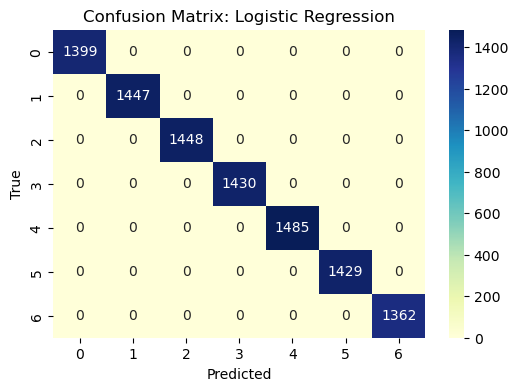

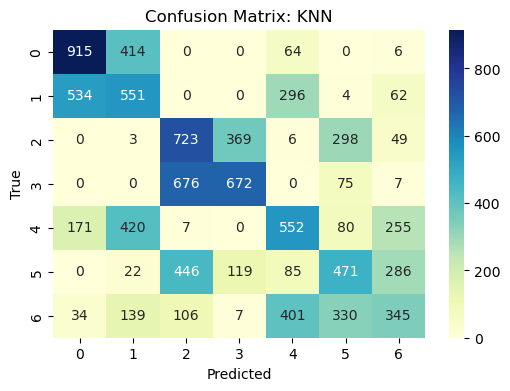

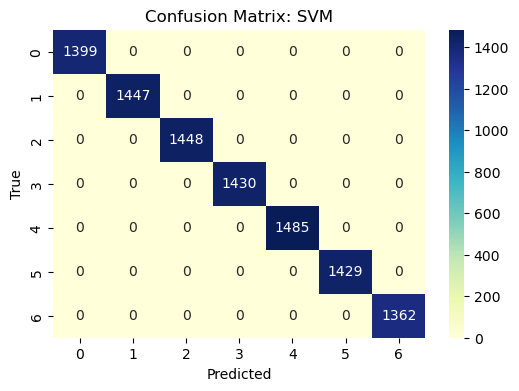

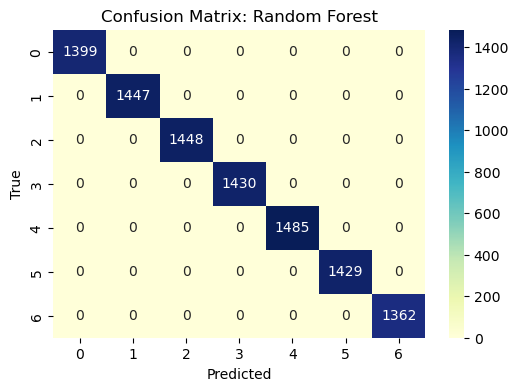

In [27]:
# 6. Plot confusion matrix for each model
for name, model in trained_models.items():  # to loop through out the model
    y_pred = model.predict(X_test)   # to predict values 
    cm = confusion_matrix(y_test, y_pred)    # To generate the confusion matrix
    plt.figure(figsize=(6, 4))         # To set the figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')  # plot heatmap
    plt.title(f"Confusion Matrix: {name}")   # deal with providing the title 
    plt.xlabel('Predicted')        # for x-axis label
    plt.ylabel('True')             # for y-axis label
    plt.show()                      # To display the plot

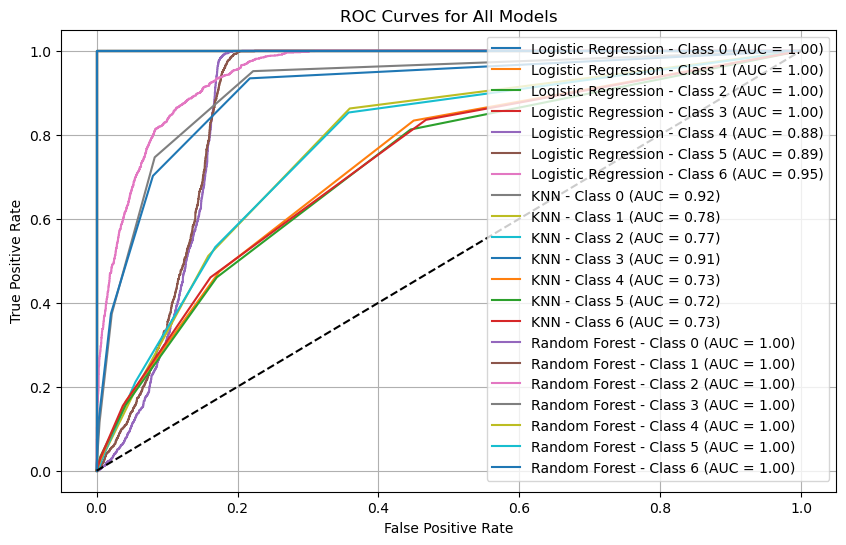

In [28]:
# 7. Plot ROC Curves for all models (for multiclass using One-vs-Rest strategy)
classes = np.unique(y)     # to find all unique class labels
y_test_bin = label_binarize(y_test, classes=classes)   # To turn y_test to the binary format
n_classes = y_test_bin.shape[1]        # For numbers of the target classes

plt.figure(figsize=(10, 6))  # to set the figure size
for name, model in trained_models.items():
    if name == "SVM":  # To skip SVM because it may raise issues with predict_proba
        continue
    try:
        classifier = OneVsRestClassifier(model) # To convert to the multiclass
        y_score = classifier.fit(X_train, y_train).predict_proba(X_test)   # T display the prediction scores
        for i in range(n_classes):   # To plot ROC for each of the class
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i]) # To get true or false rates
            roc_auc = auc(fpr, tpr)  # this to calculate area under the curve
            plt.plot(fpr, tpr, label=f"{name} - Class {i} (AUC = {roc_auc:.2f})")
    except Exception as e:
        print(f"Error with model {name}: {e}")   # To display errors if the happen

plt.plot([0, 1], [0, 1], 'k--')   # is the diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.grid()
plt.show()

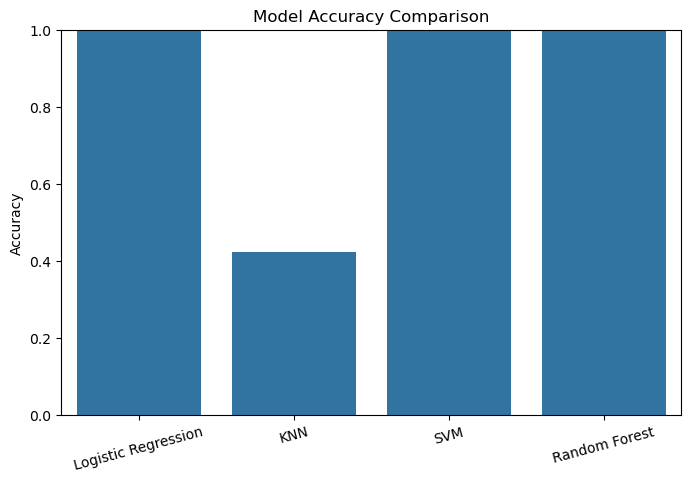

In [29]:
# 8. Compare model accuracy in a bar chart
accuracies = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in trained_models.items()}

plt.figure(figsize=(8, 5))  # to pick figure size
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values())) # To draw the bar chart
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # to set the y-axis limit
plt.xticks(rotation=15)   # this to rotate x-labels for the readability
plt.show()  # to display

In [30]:
# 9. Grid search for best parameters (Random Forest example)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 1.0


## Reflection
Based on the evaluation metrics and visualizations, the **Random Forest** model performed the best in terms of overall accuracy and balanced performance across precision, recall, and F1-score. This may be attributed to its ability to handle feature interactions and overfitting prevention through ensemble learning.

## The **SVM** and **Logistic Regression** models also performed well but may be less flexible for multiclass classification tasks compared to Random Forest. KNN showed acceptable performance but is sensitive to data scaling and noise.

In [31]:
# Display the first few rows
movie.head()

,Title,Year,Director,Duration,Rating,Votes,Description,Language,Country,Budget_USD,BoxOffice_USD,Genre,Production_Company,Content_Rating,Lead_Actor,Num_Awards,Critic_Reviews
0,254,1980,7,167,4.1,182425,4,6,0,39979615,179936008,5,1,4,5,8,229
1,82,2014,8,166,4.1,449351,0,4,0,116404774,802121619,0,2,4,5,20,466
2,231,2016,0,170,4.1,363328,0,4,3,166261330,225526871,0,4,2,0,16,539
3,34,1982,3,170,9.9,62371,5,3,3,28861315,69813738,2,2,1,7,15,606
4,0,1990,3,91,5.3,4600,6,4,6,43890403,375136716,3,6,2,3,6,330
